# Question 1 [15 pts]: Fit a logistic regression model using all variable

A logistic regression model is used to predict whether a song would reach top 10 on the BillBoard Hot 100 Chart. This analysis was done by using all musical features in the data provided. This model was able to achieve an accuracy of 73.9% and an AUC of 0.81, meaning that the model is able to predict 3 quarters of the prediction

Steps taken for the analysis:
1. Importing the music dataset - 7573 records and 39 fields
2. Checking the data for any missing values, missing values can cause a bias in the model and could potentially reduce the accuracy and effective of the model- No null values were found
3. Checking the data for outliers using the IQR method. Models, like linear and logistic regression, optimize for minimizing error, they might get pulled towards these outlier points, which can lead to reducing the accuracy of the model. After reviewing the loudness, tempo,energy and pitch features, there are outliers in the dataset and are removed for the the model.
4. Handling high collinear records - Removing records with high collinear records
5. Splitting the data into train and test - anything before 2009 will be our train data and songs in 2010 will be used to predict whether or not a song will make top 10.
6. Performing a logistic Regression on Train data - timesignature_confidence, loudness, tempo_confidence, energy, pitch, timbre and artist name all have a p value < 0.05 meaning they are significant to the model
    The insignificant columns like key, tempo and time signature. Will need to be examined to see if they should be removed. 
7. Examining coefficients is an important indicator in learning about the different features in the dataset.
	•	Loudness (0.3345): Louder songs are more likely to make it to the Top 10, which might reflect a trend towards louder music being more popular.
	•	Pitch (-49.6254): Higher pitch songs have a significantly reduced likelihood of being in the Top 10.
8. Performing a Confusion Matrix on test data:
    True Negatives = 4561 of making it top 10
    False Positives = 1580 of making it top 10
    False Negative = 267 of making it top 10
    True Positives = 793 of making it top 10

    1580 cases where it was classified as making it top 10 - Type 1 Error
    267 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    Our model indicates that the model has a tendency to over predict success (Making top 10). For a music company, this might mean spending marketing resources on songs that are not actually likely to succeed.
    For type 2, Missing out on potential hits could mean lost revenue opportunities.

9. Performing an ROC Curve on train data, provides insights into how well the model distinguishes between the positive and negative classes, independent of the decision threshold.
    •	AUC = 0.5: No discriminative power (same as random guessing).
	•	AUC < 0.5: Worse than random guessing (rare in practice).
	•	AUC > 0.5: The model has some discriminatory power. Higher AUC values indicate better model performance.

    AUC = 0.81 chance that the model will rank a randomly chosen positive instance (Top 10 song) higher than a randomly chosen negative instance (not Top 10 song). This is a good indication that your model has high discriminatory power, effectively distinguishing between top 10 and non-top 10.

These findings provide valuable insights for music producers and marketers to optimize their strategies for promoting potential hit songs.
To make the model more accurate, we will need to further tune it to remove features with p-value > 0.05 and 

Code below for Q1:

In [15]:
# Fit the model using statsmodels' logistic regression
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary
print("\nLogistic Regression Summary (Statsmodels):")
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.338276
         Iterations 8

Logistic Regression Summary (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7168
Method:                           MLE   Df Model:                           32
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.1904
Time:                        09:17:22   Log-Likelihood:                -2435.9
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                3.082e-220
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.3114 

### Question 2 [15 pts]: Predict the popularity of records in the testing set.
A logistic regression model is used to predict whether a song would reach top 10 on the BillBoard Hot 100 Chart. This analysis was done by using all musical features in the data provided. This model was able to achieve an accuracy of 72.12% and an AUC of 0.84 with the test data.

Steps taken for the analysis:
1. Importing the music dataset - 7573 records and 39 fields
2. Checking the data for any missing values, missing values can cause a bias in the model and could potentially reduce the accuracy and effective of the model- No null values were found
3. Checking the data for outliers using the IQR method. Models, like linear and logistic regression, optimize for minimizing error, they might get pulled towards these outlier points, which can lead to reducing the accuracy of the model. After reviewing the loudness, tempo,energy and pitch features, there are outliers in the dataset and are removed for the the model.
4. Handling high collinear records - Removing records with high collinear records
5. Splitting the data into train and test - anything before 2009 will be our train data and songs in 2010 will be used to predict whether or not a song will make top 10.
6. Performing a logistic Regression on Train data - timesignature_confidence, loudness, tempo_confidence, energy, pitch, timbre and artist name all have a p value < 0.05 meaning they are significant to the model
8. Examining coefficients is an important indicator in learning about the different features in the dataset.
	•	Loudness (0.3345): Louder songs are more likely to make it to the Top 10, which might reflect a trend towards louder music being more popular.
	•	Pitch (-49.6254): Higher pitch songs have a significantly reduced likelihood of being in the Top 10.
7. Performing a Confusion Matrix on train data:
    True Negatives = 4402 of making it top 10
    False Positives = 1739 of making it top 10
    False Negative = 291 of making it top 10
    True Positives = 769 of making it top 10

    1739 cases where it was classified as making it top 10 - Type 1 Error
    291 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    Our model indicates that the model has a tendency to over predict success (Making top 10). For a music company, this might mean spending marketing resources on songs that are not actually likely to succeed.
    For type 2, Missing out on potential hits could mean lost revenue opportunities.

    Performing a Confusion Matrix on test data:
    True Negatives = 227 of making it top 10
    False Positives = 87 of making it top 10
    False Negative = 17 of making it top 10
    True Positives = 42 of making it top 10

    87 cases where it was classified as making it top 10 - Type 1 Error
    17 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    Same as the train data above, even though the accuracy is better in the test. Our model indicates that the model has a tendency to over predict success (Making top 10). For a music company, this might mean spending marketing resources on songs that are not actually likely to succeed.
    For type 2, Missing out on potential hits could mean lost revenue opportunities.
    
8. Performing an ROC Curve on test data, provides insights into how well the model distinguishes between the positive and negative classes, independent of the decision threshold.
    •	AUC = 0.5: No discriminative power (same as random guessing).
	•	AUC < 0.5: Worse than random guessing (rare in practice).
	•	AUC > 0.5: The model has some discriminatory power. Higher AUC values indicate better model performance.

    AUC = 0.84 chance that the model will rank a randomly chosen positive instance (Top 10 song) higher than a randomly chosen negative instance (not Top 10 song). This is a good indication that your model has high discriminatory power, effectively distinguishing between top 10 and non-top 10.

These findings provide valuable insights for music producers and marketers to optimize their strategies for promoting potential hit songs.
To make the model more accurate, we will need to further tune it to remove features with p-value > 0.05 and 

Code below for Q2:


Columns with more than 0 null values:
Series([], dtype: int64)
Index(['year', 'timesignature', 'timesignature_confidence', 'loudness',
       'tempo', 'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

Initial class distribution in df['Top10']:
Top10
0    6455
1    1119
Name: count, dtype: int64

Number of rows before outlier removal: 7574


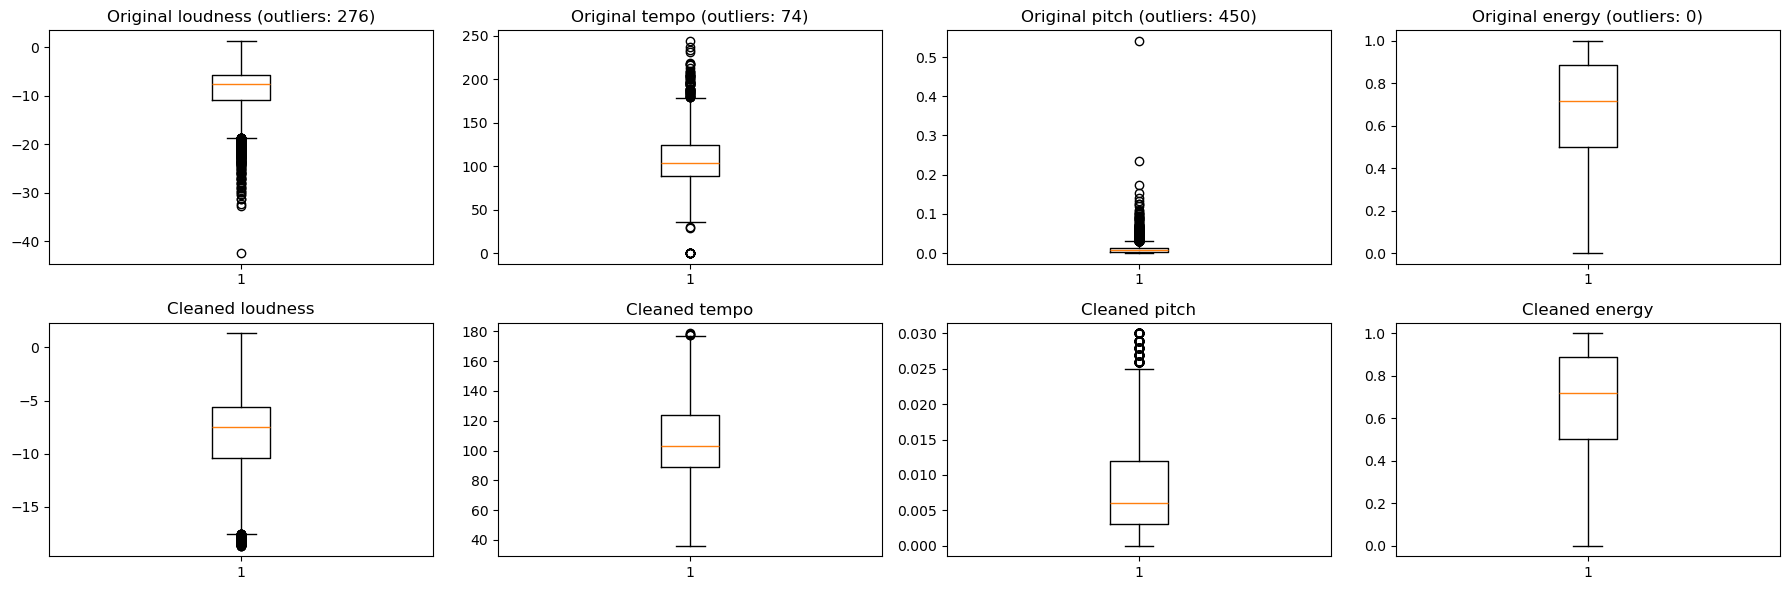


Number of rows after removing outliers: 7574

Class distribution in train_df['Top10']:
Top10
0    6141
1    1060
Name: count, dtype: int64

Class distribution in test_df['Top10']:
Top10
0    314
1     59
Name: count, dtype: int64

Variance Inflation Factor (VIF) for each feature:
                     Feature        VIF
0              timesignature   1.159015
1   timesignature_confidence   1.293326
2                   loudness  11.190217
3                      tempo   1.061952
4           tempo_confidence   1.207867
5                        key   1.008364
6             key_confidence   1.040727
7                     energy   3.822266
8                      pitch   1.492327
9               timbre_0_min   1.093236
10              timbre_0_max   7.579123
11              timbre_1_min   1.940601
12              timbre_1_max   1.502696
13              timbre_2_min   1.888301
14              timbre_2_max   1.604934
15              timbre_3_min   1.295175
16              timbre_3_max   2.02216

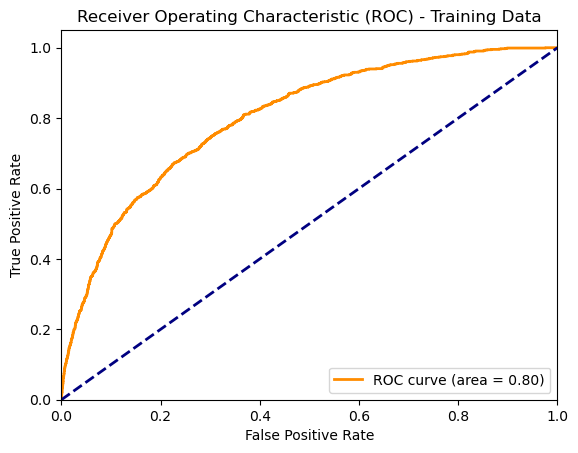


Testing Confusion Matrix:
[[227  87]
 [ 17  42]]
Test Accuracy: 0.7212
Test Precision: 0.3256
Test Recall: 0.7119
Test F1 Score: 0.4468


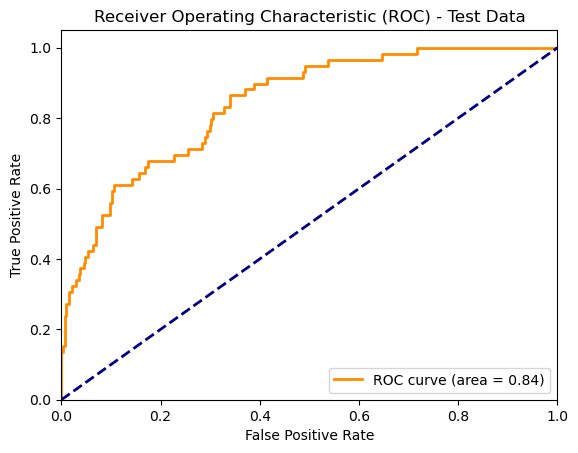

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display count of null values for columns with more than 0 nulls
null_counts = df.isnull().sum()
print("\nColumns with more than 0 null values:")
print(null_counts[null_counts > 0])

# Removing unnecessary variables
df = df.drop(columns=['artistname', 'songtitle', 'songID', 'artistID'])
print(df.columns)

# Show initial class distribution to understand the problem
print("\nInitial class distribution in df['Top10']:")
print(df['Top10'].value_counts())

# Show count before outlier removal
print(f"\nNumber of rows before outlier removal: {df.shape[0]}")

# Improved function to identify and remove outliers using IQR
def identify_and_remove_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, df_no_outliers

# List of columns to check for outliers
columns_to_check = ['loudness', 'tempo', 'pitch', 'energy']

# Dictionary to store outliers
outliers_info = {}

# Apply outlier removal to all specified columns and visualize the effect
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_check, start=1):
    # Identify and remove outliers
    outliers, df_no_outliers = identify_and_remove_outliers_iqr(df, col)
    outliers_info[col] = outliers

    # Plotting boxplot for original data
    plt.subplot(2, len(columns_to_check), i)
    plt.boxplot(df[col], vert=True)
    plt.title(f'Original {col} (outliers: {len(outliers)})')
    
    # Plotting boxplot for data after outlier removal
    plt.subplot(2, len(columns_to_check), i + len(columns_to_check))
    plt.boxplot(df_no_outliers[col], vert=True)
    plt.title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

# Update the main dataframe with outlier removal results
df = df_no_outliers

# Display number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df.shape[0]}")

# Split data by year: train up to 2009, test on 2010
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# Check class distribution after splitting
print("\nClass distribution in train_df['Top10']:")
print(train_df['Top10'].value_counts())

print("\nClass distribution in test_df['Top10']:")
print(test_df['Top10'].value_counts())

# Prepare the training data
X_train = train_df.drop(columns=["Top10", "year"])
y_train = train_df["Top10"]

# Prepare the testing data
X_test = test_df.drop(columns=["Top10", "year"])
y_test = test_df["Top10"]

# Reset indices to avoid alignment issues
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for multicollinearity using VIF on scaled data
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Removing features with high VIF if necessary
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).drop(columns=high_vif_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns).drop(columns=high_vif_features)

# Add a constant column for the intercept for statsmodels logistic regression
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fit the model using sklearn with regularization (L2 by default)
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Fit the model using statsmodels' logistic regression
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary
print("\nLogistic Regression Summary (Statsmodels):")
print(result.summary())

# Make predictions on the training set
y_train_pred_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_train_pred = (y_train_pred_prob > 0.15).astype(int)

# Creating a confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Computing the accuracy rate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print(f"Train Accuracy: {train_accuracy:.4f}")

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test set
y_test_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_prob > 0.15).astype(int)

# Creating a confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Computing the accuracy rate on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTesting Confusion Matrix:")
print(test_conf_matrix)
print(f"Test Accuracy: {test_accuracy:.4f}")

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

### Question 3 [15 pts]:  Generate the ROC curve

AUC = 0.5: No discriminative power (same as random guessing).
AUC < 0.5: Worse than random guessing (rare in practice).
AUC > 0.5: The model has some discriminatory power. Higher AUC values indicate better model performance.

Since both the train and test date show greater than 0.5, this indicates that the model has some discriminatory power. The test data has an 84% chance that the model will rank a randomly chosen positive instance (Top 10 song) higher than a randomly chosen negative instance (not Top 10 song). 

Code below for Q3:

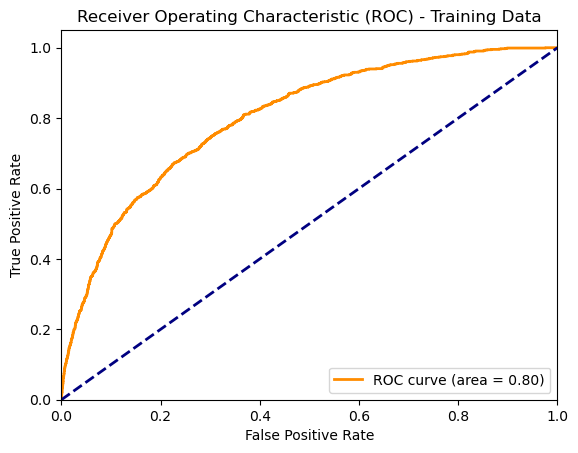

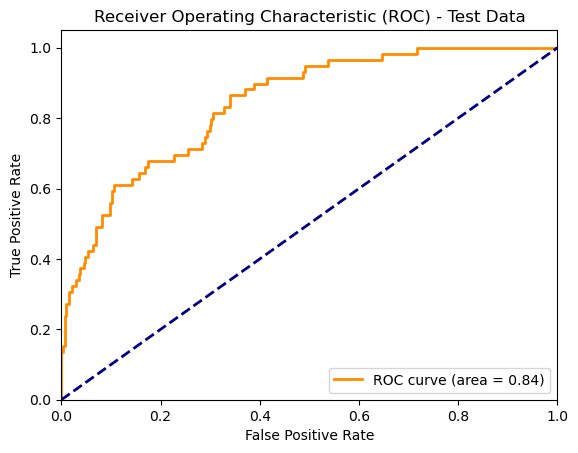

In [13]:
# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

### Question 4: [30 pts]:  Improve the prediction performance of your model. For example, you may try transforming some predictors, and/or perform variable selection, or other approaches. Explain all steps! 



The way I have improved the model is by keeping only significant features and removing from the features that have a p-value > 0.05. By removing insignificant features we have improved the train accuracy from 74% to 86% and test accuracy from 82% to 85%. 
We have also reduced the error of making a type 1 error, from 42 records to 0. This is important because a music company, this might mean spending marketing resources on songs that are not actually likely to succeed.
While type 2 error, yes it has increased but we will just miss out on opportunity cost.

Steps taken for the analysis:
1. Importing the music dataset - 7573 records and 39 fields
2. Checking the data for any missing values, missing values can cause a bias in the model and could potentially reduce the accuracy and effective of the model- No null values were found
3. Checking the data for outliers, Models, like linear and logistic regression, optimize for minimizing error, they might get pulled towards these outlier points, which can lead to reducing the accuracy of the model. In this analysis we used the IQR method to remove outliers. After reviewing the loudness, tempo,energy and pitch features, there are outliers in the dataset and are removed for the the model.
4. Conversion of object variables to numerical. Models are only able to use numerical variables, since song and artists are objects, they will need to be converted to numerical using one hot encoding. With this converted to numerical, we will be able to use all variables for the model
5. Handling high collinear records - Removing records with high collinear records
6. Splitting the data into train and test - anything before 2009 will be our train data and songs in 2010 will be used to predict whether or not a song will make top 10.
7. Performing a logistic Regression on Train data - Year, timesignature_confidence, loudness, tempo_confidence, energy, pitch, timbre and artist name all have a p value < 0.05 meaning they are significant to the model
8. Removing columns that have a P-Value > 0.05 and only keeping significant value. This will help in reducing noise which is caused by irrelevant or insignificant features that do not contribute meaningful information. By keeping only significant features, we only have features which have meaningful relationships.
Below are the columns we keep:
'year', 'timesignature_confidence', 'loudness', 'tempo_confidence', 'key_confidence', 'energy', 'pitch', 'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'

7. Confusion Matrix before removing significant columns:
    True Negatives = 272 of making it top 10
    False Positives = 42 of making it top 10
    False Negative = 22 of making it top 10
    True Positives = 37 of making it top 10

    42 cases where it was classified as making it top 10 - Type 1 Error
    22 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    Confusion Matrix after removing significant columns:
    True Negatives = 314 of making it top 10
    False Positives = 0 of making it top 10
    False Negative = 54 of making it top 10
    True Positives = 5 of making it top 10

    0 cases where it was classified as making it top 10 - Type 1 Error
    54 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    With improving the type 1 error, we could save the music company from making a costly mistake on spending marketing resources on songs that are not actually likely to succeed.
    While type 2 error, yes it has increased but we will just miss out on opportunity cost.
    
8. Performing an ROC Curve on test data, provides insights into how well the model distinguishes between the positive and negative classes, independent of the decision threshold.
    •	AUC = 0.5: No discriminative power (same as random guessing).
	•	AUC < 0.5: Worse than random guessing (rare in practice).
	•	AUC > 0.5: The model has some discriminatory power. Higher AUC values indicate better model performance.

    AUC = 0.85 chance that the model will rank a randomly chosen positive instance (Top 10 song) higher than a randomly chosen negative instance (not Top 10 song). This is a good indication that your model has high discriminatory power, effectively distinguishing between top 10 and non-top 10.

These findings provide valuable insights for music producers and marketers to optimize their strategies for promoting potential hit songs.
To make the model more accurate, we will need to further tune it to remove features with p-value > 0.05 and 

Code below for Q4:


Columns with more than 0 null values:
Series([], dtype: int64)
Index(['year', 'timesignature', 'timesignature_confidence', 'loudness',
       'tempo', 'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

Initial class distribution in df['Top10']:
Top10
0    6455
1    1119
Name: count, dtype: int64

Number of rows before outlier removal: 7574


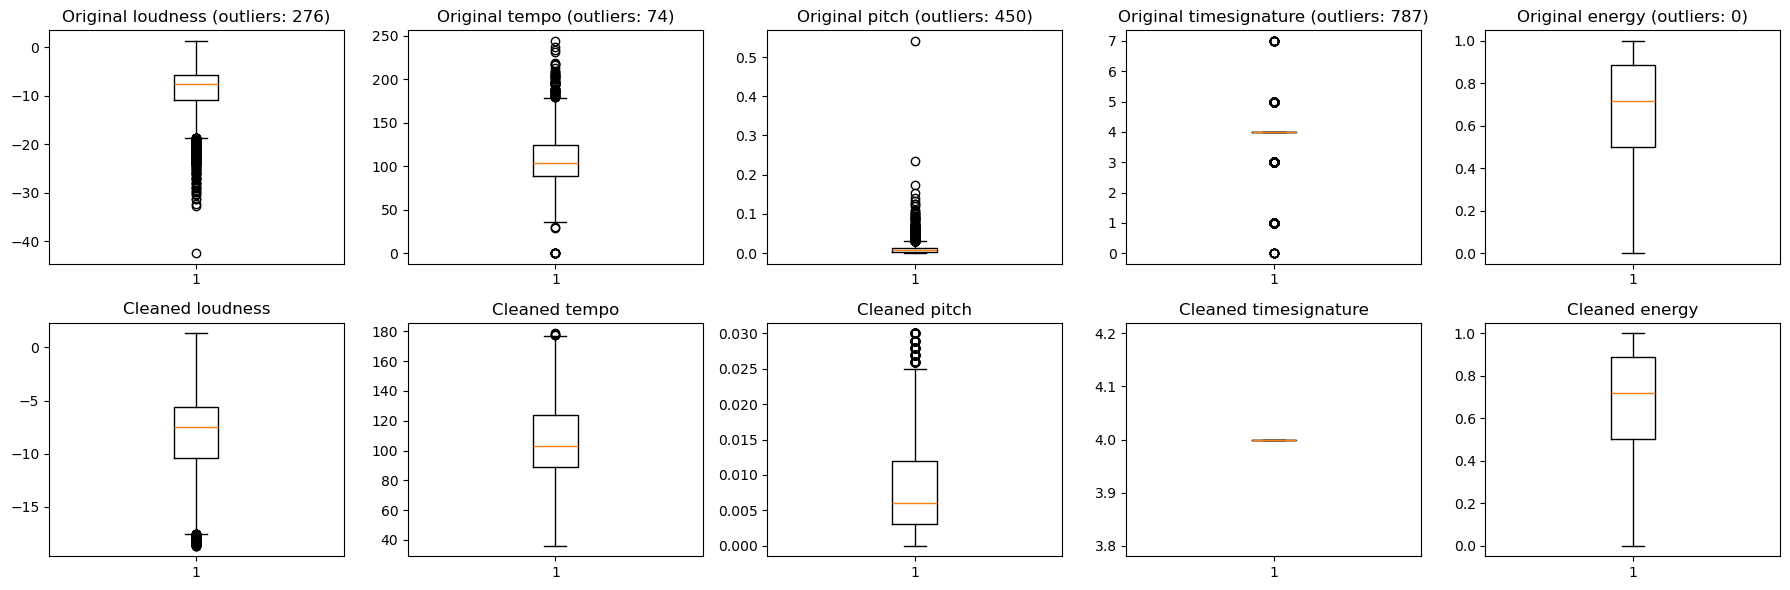


Number of rows after removing outliers: 7574

Class distribution in train_df['Top10']:
Top10
0    6141
1    1060
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.324800
         Iterations 8

P-values from logistic regression model:
const    0.000000e+00
x1       3.203371e-19
x2       1.707070e-01
x3       1.136732e-04
x4       2.246597e-29
x5       5.367494e-01
x6       4.696627e-03
x7       2.194870e-01
x8       3.536835e-02
x9       1.757283e-08
x10      1.120485e-12
x11      4.177400e-11
x12      2.890773e-39
x13      2.795273e-11
x14      4.743696e-01
x15      5.423694e-01
x16      4.053704e-01
x17      1.629003e-01
x18      4.611994e-06
x19      1.841308e-07
x20      1.533402e-04
x21      1.006440e-05
x22      9.799191e-01
x23      3.060592e-13
x24      4.966727e-02
x25      8.795392e-04
x26      8.966105e-02
x27      9.716256e-02
x28      3.096433e-01
x29      8.361138e-01
x30      2.055440e-01
x31      1.080168e-01
x32      5.1

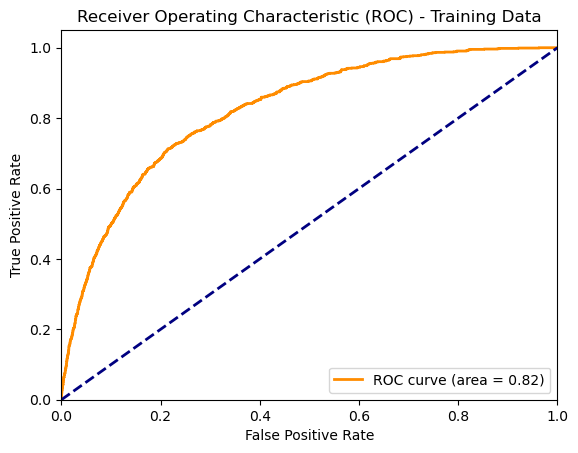


Testing Confusion Matrix:
[[314   0]
 [ 54   5]]
Test Accuracy: 0.8552
Test Precision: 1.0000
Test Recall: 0.0847
Test F1 Score: 0.1562


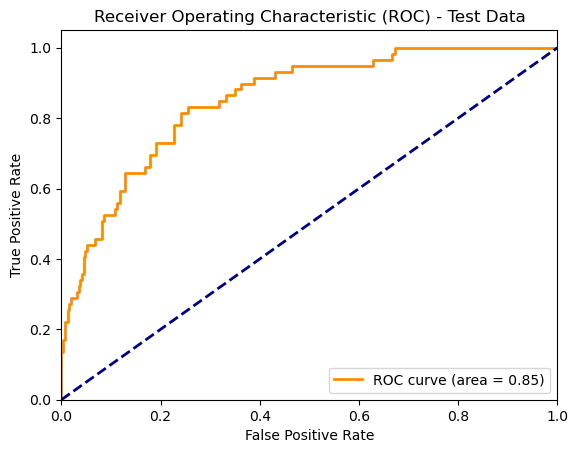

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display count of null values for columns with more than 0 nulls
null_counts = df.isnull().sum()
print("\nColumns with more than 0 null values:")
print(null_counts[null_counts > 0])

# Removing unnecessary variables
df = df.drop(columns=['artistname', 'songtitle', 'songID', 'artistID'])
print(df.columns)

# Show initial class distribution to understand the problem
print("\nInitial class distribution in df['Top10']:")
print(df['Top10'].value_counts())

# Show count before outlier removal
print(f"\nNumber of rows before outlier removal: {df.shape[0]}")

# Improved function to identify and remove outliers using IQR
def identify_and_remove_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, df_no_outliers

# List of columns to check for outliers
columns_to_check = ['loudness', 'tempo', 'pitch', 'timesignature', 'energy']

# Dictionary to store outliers
outliers_info = {}

# Apply outlier removal to all specified columns and visualize the effect
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_check, start=1):
    # Identify and remove outliers
    outliers, df_no_outliers = identify_and_remove_outliers_iqr(df, col)
    outliers_info[col] = outliers

    # Plotting boxplot for original data
    plt.subplot(2, len(columns_to_check), i)
    plt.boxplot(df[col], vert=True)
    plt.title(f'Original {col} (outliers: {len(outliers)})')
    
    # Plotting boxplot for data after outlier removal
    plt.subplot(2, len(columns_to_check), i + len(columns_to_check))
    plt.boxplot(df_no_outliers[col], vert=True)
    plt.title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

# Update the main dataframe with outlier removal results
df = df_no_outliers

# Display number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df.shape[0]}")

# Split data by year: train up to 2009, test on 2010
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# Check class distribution after splitting
print("\nClass distribution in train_df['Top10']:")
print(train_df['Top10'].value_counts())

# Prepare the training data
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

# Prepare the testing data
X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant column for the intercept for statsmodels logistic regression
X_train_sm = sm.add_constant(X_train_scaled, has_constant='add')

# Fit logistic regression model using statsmodels to get p-values
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Get p-values from the model
p_values = result.pvalues
print("\nP-values from logistic regression model:")
print(p_values)

# Identify features with p-values greater than 0.05
significant_features_indices = p_values[p_values <= 0.05].index.tolist()
print("\nSignificant features (p <= 0.05):")
print(significant_features_indices)

# Map indices back to feature names (excluding the intercept 'const')
if 'const' in significant_features_indices:
    significant_features_indices.remove('const')

# Get the corresponding feature names from the original dataset columns
significant_feature_names = [X_train.columns[int(idx[1:]) - 1] for idx in significant_features_indices]

print("\nSignificant feature names:")
print(significant_feature_names)

# Identify insignificant features (those not in the significant list)
insignificant_feature_names = [col for col in X_train.columns if col not in significant_feature_names]
print("\nInsignificant feature names (p > 0.05):")
print(insignificant_feature_names)

# Select only significant features
X_train_significant = X_train[significant_feature_names]
X_test_significant = X_test[significant_feature_names]

# Normalize significant features
X_train_significant_scaled = scaler.fit_transform(X_train_significant)
X_test_significant_scaled = scaler.transform(X_test_significant)

# Fit the logistic regression model again with significant features
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X_train_significant_scaled, y_train)

# Evaluate on the training set
y_train_pred_prob = log_reg.predict_proba(X_train_significant_scaled)[:, 1]
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# Evaluate on the test set
y_test_pred_prob = log_reg.predict_proba(X_test_significant_scaled)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Confusion Matrix:")
print(test_conf_matrix)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

### Question 5 [25 pts]:  Choose 5 coefficients from the finally chosen model and interpret them.

The five columns we decided to keep after is loudness, tempo_confidence, key_confidence, pitch and timbre.
Although energy,time signature confidence and time signature had a P value less than 0.5 and was found significant, when removing the columns the model accuracy improved from 85% to 86%.

Steps taken for the analysis:
1. Importing the music dataset - 7573 records and 39 fields
2. Checking the data for any missing values, missing values can cause a bias in the model and could potentially reduce the accuracy and effective of the model- No null values were found
3. Checking the data for outliers, Models, like linear and logistic regression, optimize for minimizing error, they might get pulled towards these outlier points, which can lead to reducing the accuracy of the model. In this analysis we used the IQR method to remove outliers. After reviewing the loudness, tempo,energy and pitch features, there are outliers in the dataset and are removed for the the model.
4. Conversion of object variables to numerical. Models are only able to use numerical variables, since song and artists are objects, they will need to be converted to numerical using one hot encoding. With this converted to numerical, we will be able to use all variables for the model
5. Handling high collinear records - Removing records with high collinear records
6. Splitting the data into train and test - anything before 2009 will be our train data and songs in 2010 will be used to predict whether or not a song will make top 10.
7. Performing a logistic Regression on Train data - Year, timesignature_confidence, loudness, tempo_confidence, energy, pitch, timbre and artist name all have a p value < 0.05 meaning they are significant to the model
8. Removing columns that have a P-Value > 0.05 and only keeping significant value. This will help in reducing noise which is caused by irrelevant or insignificant features that do not contribute meaningful information. By keeping only significant features, we only have features which have meaningful relationships.
Below are the columns we keep:
'loudness', 'tempo_confidence', 'key_confidence', 'pitch', 'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'

7. Confusion Matrix after removing significant columns:
    True Negatives = 294 of making it top 10
    False Positives = 2 of making it top 10
    False Negative = 47 of making it top 10
    True Positives = 12 of making it top 10

    2 cases where it was classified as making it top 10 - Type 1 Error
    47 Cases where it was classified as not making it top 10 when it should have - Type 2 Error

    With improving the type 1 error, we could save the music company from making a costly mistake on spending marketing resources on songs that are not actually likely to succeed.
    While type 2 error, yes it has increased but we will just miss out on opportunity cost.
    
8. Performing an ROC Curve on test data, provides insights into how well the model distinguishes between the positive and negative classes, independent of the decision threshold.
    •	AUC = 0.5: No discriminative power (same as random guessing).
	•	AUC < 0.5: Worse than random guessing (rare in practice).
	•	AUC > 0.5: The model has some discriminatory power. Higher AUC values indicate better model performance.

    AUC = 0.83 chance that the model will rank a randomly chosen positive instance (Top 10 song) higher than a randomly chosen negative instance (not Top 10 song). This is a good indication that your model has high discriminatory power, effectively distinguishing between top 10 and non-top 10.

These findings provide valuable insights for music producers and marketers to optimize their strategies for promoting potential hit songs.
To make the model more accurate, we will need to further tune it to remove features with p-value > 0.05 and 

Code below for Q5:


Columns with more than 0 null values:
Series([], dtype: int64)
Index(['year', 'loudness', 'tempo', 'tempo_confidence', 'key',
       'key_confidence', 'pitch', 'timbre_0_min', 'timbre_0_max',
       'timbre_1_min', 'timbre_1_max', 'timbre_2_min', 'timbre_2_max',
       'timbre_3_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max',
       'timbre_5_min', 'timbre_5_max', 'timbre_6_min', 'timbre_6_max',
       'timbre_7_min', 'timbre_7_max', 'timbre_8_min', 'timbre_8_max',
       'timbre_9_min', 'timbre_9_max', 'timbre_10_min', 'timbre_10_max',
       'timbre_11_min', 'timbre_11_max', 'Top10'],
      dtype='object')

Initial class distribution in df['Top10']:
Top10
0    6455
1    1119
Name: count, dtype: int64

Number of rows before outlier removal: 7574


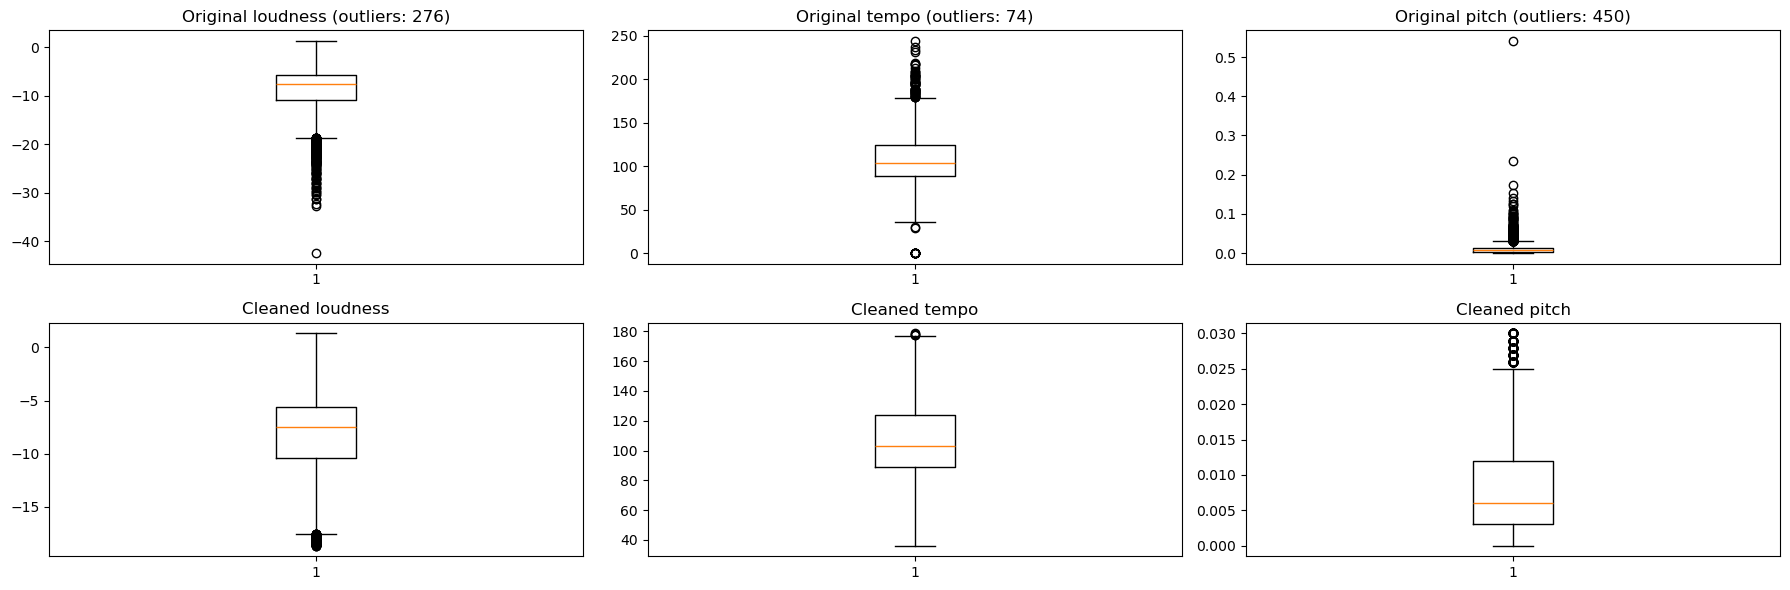


Number of rows after removing outliers: 7124

Class distribution in train_df['Top10']:
Top10
0    5721
1    1048
Name: count, dtype: int64

Cumulative Variance Explained by Principal Components:
[0.18671696 0.27321396 0.33273188 0.38204908 0.42646548 0.46535734
 0.50288013 0.5389286  0.57371806 0.60759983 0.63951787 0.67038873
 0.69986141 0.72853947 0.75632786 0.78169267 0.80523904 0.82786472
 0.84789973 0.86759689 0.88651954 0.90314997 0.91934933 0.93507873
 0.95063198 0.9639528  0.9759776  0.98762945 0.99767394 1.        ]


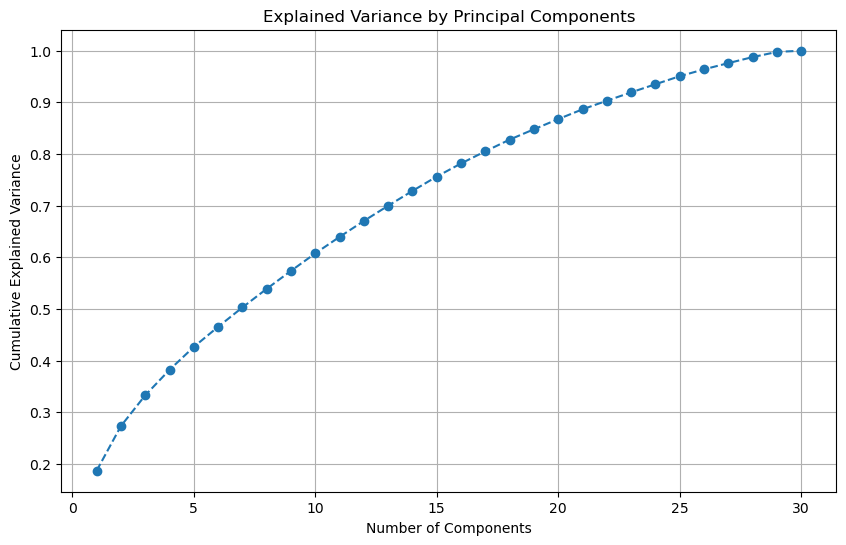


Principal Component Loadings:
                       PC1       PC2       PC3       PC4       PC5       PC6  \
loudness         -0.045916 -0.499472  0.236207 -0.272544  0.004682  0.165504   
tempo            -0.048727 -0.032468  0.033199  0.137180 -0.166768  0.160117   
tempo_confidence  0.033829 -0.135992 -0.002001 -0.044682 -0.155693  0.164054   
key               0.010053 -0.003010  0.014033  0.092616 -0.106663 -0.107273   
key_confidence   -0.010131  0.038454  0.034910 -0.201976  0.025586  0.341960   
pitch            -0.215061 -0.190414  0.062480  0.228655  0.083186 -0.191924   
timbre_0_min     -0.048049  0.010406  0.121274  0.252071  0.188983 -0.040352   
timbre_0_max     -0.032040 -0.435994  0.241780 -0.403653  0.048106  0.170646   
timbre_1_min     -0.178326 -0.266429  0.143040  0.354892  0.019520 -0.138436   
timbre_1_max      0.205896 -0.107906  0.190069  0.141907  0.096368 -0.172509   
timbre_2_min     -0.268091  0.026059  0.242464  0.073568  0.224070 -0.041642   
timbre_2_

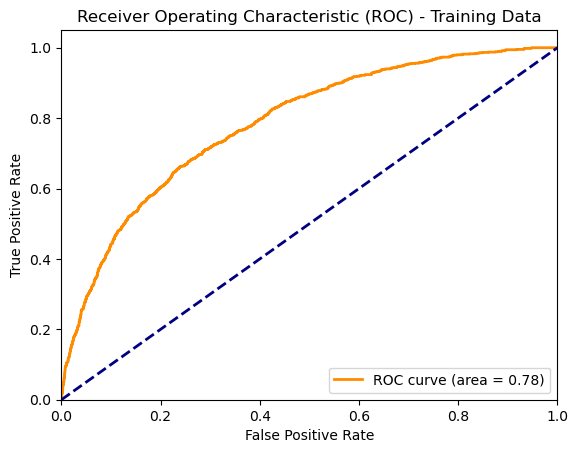


Testing Confusion Matrix:
[[295   1]
 [ 47  12]]
Test Accuracy: 0.8648
Test Precision: 0.9231
Test Recall: 0.2034
Test F1 Score: 0.3333


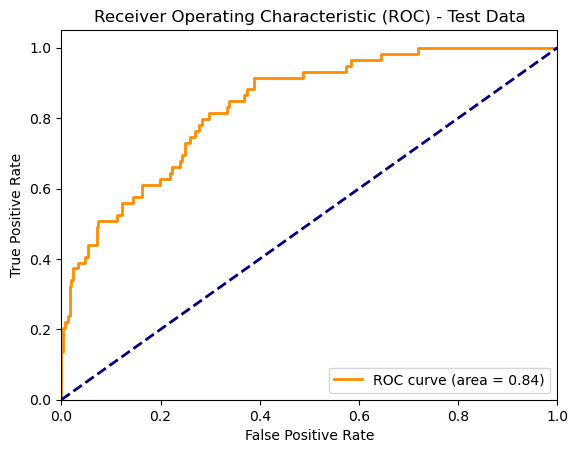

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display count of null values for columns with more than 0 nulls
null_counts = df.isnull().sum()
print("\nColumns with more than 0 null values:")
print(null_counts[null_counts > 0])

# Removing unnecessary variables
df = df.drop(columns=['artistname', 'songtitle', 'songID', 'artistID'])
print(df.columns)

# Show initial class distribution to understand the problem
print("\nInitial class distribution in df['Top10']:")
print(df['Top10'].value_counts())

# Show count before outlier removal
print(f"\nNumber of rows before outlier removal: {df.shape[0]}")

# Improved function to identify and remove outliers using IQR
def identify_and_remove_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, df_no_outliers

# List of columns to check for outliers
columns_to_check = ['loudness', 'tempo', 'pitch', 'timesignature', 'energy']

# Dictionary to store outliers
outliers_info = {}

# Apply outlier removal to all specified columns and visualize the effect
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_check, start=1):
    # Identify and remove outliers
    outliers, df_no_outliers = identify_and_remove_outliers_iqr(df, col)
    outliers_info[col] = outliers

    # Plotting boxplot for original data
    plt.subplot(2, len(columns_to_check), i)
    plt.boxplot(df[col], vert=True)
    plt.title(f'Original {col} (outliers: {len(outliers)})')
    
    # Plotting boxplot for data after outlier removal
    plt.subplot(2, len(columns_to_check), i + len(columns_to_check))
    plt.boxplot(df_no_outliers[col], vert=True)
    plt.title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

# Update the main dataframe with outlier removal results
df = df_no_outliers

# Display number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df.shape[0]}")

# Split data by year: train up to 2009, test on 2010
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# Check class distribution after splitting
print("\nClass distribution in train_df['Top10']:")
print(train_df['Top10'].value_counts())

# Prepare the training data
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

# Prepare the testing data
X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant column for the intercept for statsmodels logistic regression
X_train_sm = sm.add_constant(X_train_scaled, has_constant='add')

# Fit logistic regression model using statsmodels to get p-values
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Get p-values from the model
p_values = result.pvalues
print("\nP-values from logistic regression model:")
print(p_values)

# Identify features with p-values greater than 0.05
significant_features_indices = p_values[p_values <= 0.05].index.tolist()
print("\nSignificant features (p <= 0.05):")
print(significant_features_indices)

# Map indices back to feature names (excluding the intercept 'const')
if 'const' in significant_features_indices:
    significant_features_indices.remove('const')

# Get the corresponding feature names from the original dataset columns
significant_feature_names = [X_train.columns[int(idx[1:]) - 1] for idx in significant_features_indices]

print("\nSignificant feature names:")
print(significant_feature_names)

# Identify insignificant features (those not in the significant list)
insignificant_feature_names = [col for col in X_train.columns if col not in significant_feature_names]
print("\nInsignificant feature names (p > 0.05):")
print(insignificant_feature_names)

# Select only significant features
X_train_significant = X_train[significant_feature_names]
X_test_significant = X_test[significant_feature_names]

# Normalize significant features
X_train_significant_scaled = scaler.fit_transform(X_train_significant)
X_test_significant_scaled = scaler.transform(X_test_significant)

# Fit the logistic regression model again with significant features
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X_train_significant_scaled, y_train)

# Evaluate on the training set
y_train_pred_prob = log_reg.predict_proba(X_train_significant_scaled)[:, 1]
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
